JaeYoen Park 50194193

MTH 448

Due: 2023/05/14

# Analysis of Marathon Results

## Introduction

In field of analysis, there exists many different formats of data which require analyst to consider the best application in order to find the satisfying results. For one, we will analyze marathon records, which include times measured by gender, age, and distance. Since analysis and prediction are performed based on numerical data, we apply three major machine learning techniques: KDE with Bayes, K-NN, and Linear Regression.
From this project, we will be separating into 4 sections where 
1. Predict the sex of runner with 1- dimensional kernel density estimation in finish time.
2. Predict the sex of runner with 2- dimensional kernel density estimation in finish time and age.
3. Predict the sex of runner with K-NN classifier then compare each with the KDE results.
4. Predict the finish time with linear regression in 5k time and more.

Our objective is to study the various applications to explore the accuracy of prediction and decide the ideal technique.

## Background

### Kernel Density Estimation

Kernel Density Estimation(KDE) is application of kernel smoothing for probability density estimation which non-parametric method to estimate the probability density of a random variable based on kernels as weights.[1]

To estimate, we follow the equation

$$\hat{f}_h(x) = \frac{1}{n} \sum_{i=1}^n K_h(x -x_i) = \frac{1}{nh} \sum_{i=1}^n K(\frac{x -x_i}{h})$$ 

where the bandwidth selection strongly effects the estimation.[2]

To determine the best bandwidth as a best-fit model, we find the smallest log-likelihood of P(X) which is the KDE of finish times. According to several trial, we determined to use 0.01 as a bandwidth which returned the smallest result of -57243.80771063698.


In this project, we will use the `gaussian_kde` from scipy library.

### Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.[3]
The idea of this equation is classify from one of the classified result $y$ by calculating the probability considering the conditions.
$$
p(y | (x_1, x_2, x_3, \dots, x_N)) \varpropto p(y) \times \prod^N_{k = 1} p(x_k | y)
$$

for $y \in \{\text{valuables to be judged}\}$.

In this project, We will be using $\log( P(y|x) )$ instead of $ P(y|x) $ to avoid underflow errors.

### K-NN

K-NN stands for K- Nearest Neighbors. K-NN is an algorithm that is a non- parametric, supervised learning classifier. K-NN use Euclidean distance [4]

$$d({\bf v},{\bf w}) = \sqrt{\sum_{i=1}^n (v_i -w_i)^2}$$

In this project, we will be using `KNeighborsClassifier` function provided from sklearn library.

### Linear Regression

Linear regression is a linear approach in modeling relation between a scalar response and one or more explanatory variables.[5] With variables shown as scattered plot, linear regression find best linear fit based on the mean squared errors which the error refers to the distance between the slope and each variables. There are cases of simple linear regression and multivariate linear regression based on the number of explanatory variable.

In this project, we will be using `LinearRegression` provided from sklearn library.

## Data Acquisition

### Import Necessary Libraries and data

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read Marathon data 
df = pd.read_csv("marathon_results.csv")
df.sample(5)

,Age,M/F,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Finish,Pace,Overall,Gender,Division
20743,21,M,USA,00:29:39,00:56:32,01:23:45,01:50:10,01:56:01,02:17:20,02:47:05,03:22:28,03:57:32,04:12:36,00:09:39,20908,12089,4279
11424,52,M,USA,00:24:38,00:49:24,01:14:37,01:40:12,01:45:46,02:05:38,02:31:33,02:57:33,03:22:51,03:34:03,00:08:10,11468,8327,1065
16756,63,M,USA,00:26:41,00:53:27,01:20:04,01:46:45,01:52:33,02:13:20,02:40:30,03:09:05,03:38:07,03:51:53,00:08:51,16868,10503,330
25111,56,F,CAN,00:27:07,00:54:29,01:22:35,01:51:02,01:59:45,02:31:38,03:15:17,04:04:31,04:52:18,05:11:34,00:11:54,25366,11324,564
9791,45,M,MEX,00:24:21,00:48:16,01:12:31,01:37:04,01:42:25,02:01:23,02:26:24,02:52:08,03:17:56,03:29:04,00:07:59,9820,7570,1436


## Data Transformation

Since the times in marathon data are expressed in `hour:minute:second`, we will add additional column that shows converted into only minutes for analysis. 

In [3]:
# Convert time to minutes
df['total_minutes'] = pd.to_timedelta(df['Finish']).dt.total_seconds()/60
df.head()

,Age,M/F,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Finish,Pace,Overall,Gender,Division,total_minutes
0,25,M,ETH,00:14:43,00:29:43,00:44:57,01:00:29,01:04:02,01:16:07,01:32:00,01:47:59,02:02:39,02:09:17,00:04:56,1,1,1,129.283333
1,30,M,ETH,00:14:43,00:29:43,00:44:58,01:00:28,01:04:01,01:16:07,01:31:59,01:47:59,02:02:42,02:09:48,00:04:58,2,2,2,129.800000
2,29,M,KEN,00:14:43,00:29:43,00:44:57,01:00:29,01:04:02,01:16:07,01:32:00,01:47:59,02:03:01,02:10:22,00:04:59,3,3,3,130.366667
3,28,M,KEN,00:14:43,00:29:44,00:45:01,01:00:29,01:04:02,01:16:07,01:32:00,01:48:03,02:03:47,02:10:47,00:05:00,4,4,4,130.783333
4,32,M,KEN,00:14:43,00:29:44,00:44:58,01:00:28,01:04:01,01:16:07,01:32:00,01:47:59,02:03:27,02:10:49,00:05:00,5,5,5,130.816667


Due to limited size of data, we will be using 90% of the dataset as training to strengthen the classifier and 10% as testing.

In [4]:
# Split test data and train data as ratio of 1:9
train_df,test_df = train_test_split(df,test_size=0.1,random_state=123)

## Predict the sex of runner with 1- dimensional kernel density estimation in finish time.

From `train_df`, we train the classifier by applying kernel density estimation along Bayes theorem. Our goal is to predict the sex of runner based on runner's finish time that is converted into minutes. To apply Bayes probability, we calculate the P(x) which is the KDE of finish times, P(y) which is the probability in each sex, and P(x|y) which is the probability of KDE in finish times for each sex. Hence, we can predict the sex of runner by finish times from test data with the Naive based probability calculation. 

The function `marathon_probs` will determine the probability in each sex and return which sex is more likely to have higher chance by its finish time.

In this section, we will predict the sex with one variable which refer to 1 -dimensional KDE.


In [5]:
# Function that predict the sex by Naive Bayes theorem
def marathon_probs(test_df):

    prod = np.ones(2) # There are two states either Male or Female
    
    prod[0]+=np.log10(py_m * kde_m(test_df)/total) # log(P(y=male)* P(x|y=male)/ P(x))
    prod[1]+=np.log10(py_f * kde_f(test_df)/total) # log(P(y=female)* P(x|y=female)/ P(x))

    return ['M','F'][np.argmax(prod)] # return the tendency of the sex with highest probability.

In [6]:
# Convert the finish time of test data into minutes
test_df['total_minutes'] = pd.to_timedelta(test_df['Finish']).dt.total_seconds()/60 # create column of converted time 
test_min = test_df["total_minutes"]


dfm =train_df[train_df['M/F']=='M'] # data frame with Male
dff =train_df[train_df['M/F']=='F'] # data frame with Female

kde_m = gaussian_kde(dfm['total_minutes'],bw_method = 0.01) # P(x|y) y = male
kde_f = gaussian_kde(dff['total_minutes'],bw_method = 0.01) # P(x|y) y = female
kde = gaussian_kde(train_df['total_minutes'], bw_method = 0.01) # KDE by finish time

py_m = train_df[train_df['M/F']=='M']['M/F'].count() / train_df['M/F'].count() # P(y=male)
py_f = train_df[train_df['M/F']=='F']['M/F'].count() / train_df['M/F'].count() # P(y=female)
total = kde(train_df['total_minutes']).sum() # P(x) probability

prediction=[]
actual=[]
for i in range(len(test_df)):
    prediction.append(marathon_probs(test_min.iloc[i])) # prediction sex
    actual.append(test_df['M/F'].iloc[i]) # actual sex

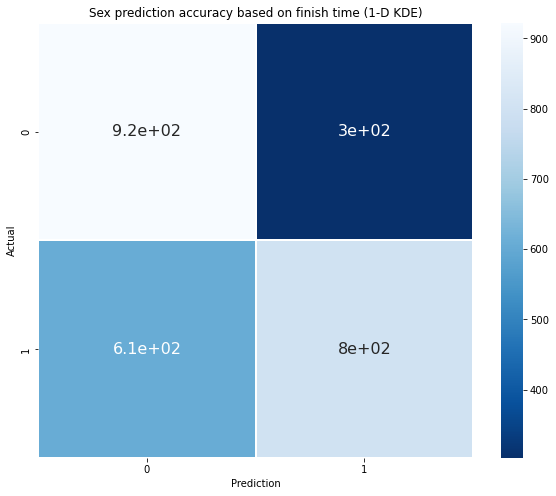

In [7]:
y_true= actual # Array of real labels
y_pred= prediction # Array of predicted labels
c =confusion_matrix(y_true, y_pred) # Confusion matrix
plt.figure(figsize=(10, 8))

sns.heatmap(c, 
            annot=True,
            annot_kws = {"fontsize": 16},
            cbar=True,
            linewidth=2,
            square=True,
            cmap="Blues_r"
            
)
plt.title("Sex prediction accuracy based on finish time (1-D KDE)")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [8]:
accuracy = (c[0,0]+c[1,1]) / len(prediction)* 100
print("The accuracy of prediction in sex based on finish time (1-D KDE) was "+ str(accuracy)+"%")

The accuracy of prediction in sex based on finish time (1-D KDE) was 65.43726235741445%


## Predict the sex of runner with 2- dimensional kernel density estimation in finish time and age.

In this section, we will predict the sex of runner not only with finish time but also age. While two variables are used, we call the estimation as 2-dimensional KDE. Since `gaussian_kde` can not be used in 2-dimensional array, we transpose to group each time and age in a same array.

In [9]:
# Convert the finish time of test data into minutes
test_df['total_minutes'] = pd.to_timedelta(test_df['Finish']).dt.total_seconds()/60 # create column of converted time 
test_min = test_df[['total_minutes','Age']]

dfm =train_df[train_df['M/F']=='M'] # data frame with Male
dff =train_df[train_df['M/F']=='F'] # data frame with Female

kde_m = gaussian_kde(dfm[['total_minutes','Age']].T,bw_method = 0.01) # P(x|y) y = male
kde_f = gaussian_kde(dff[['total_minutes','Age']].T,bw_method = 0.01) # P(x|y) y = female
kde = gaussian_kde(train_df[['total_minutes','Age']].T,bw_method = 0.01) # KDE by finish time

py_m = train_df[train_df['M/F']=='M']['M/F'].count() / train_df['M/F'].count() # P(y=male)
py_f = train_df[train_df['M/F']=='F']['M/F'].count() / train_df['M/F'].count() # P(y=female)
total = kde(train_df[['total_minutes','Age']].T).sum() # P(x) probability

prediction=[]
actual=[]
for i in range(len(test_df)):
    prediction.append(marathon_probs(test_min.iloc[i])) # prediction
    actual.append(test_df['M/F'].iloc[i]) # actual

/var/folders/1p/5r47nk_x38z6f_8ks2qp3vdm0000gn/T/ipykernel_3343/2838910498.py:7: RuntimeWarning: divide by zero encountered in log10
  prod[1]+=np.log10(py_f * kde_f(test_df)/total) # log(P(y=female)* P(x|y=female)/ P(x))


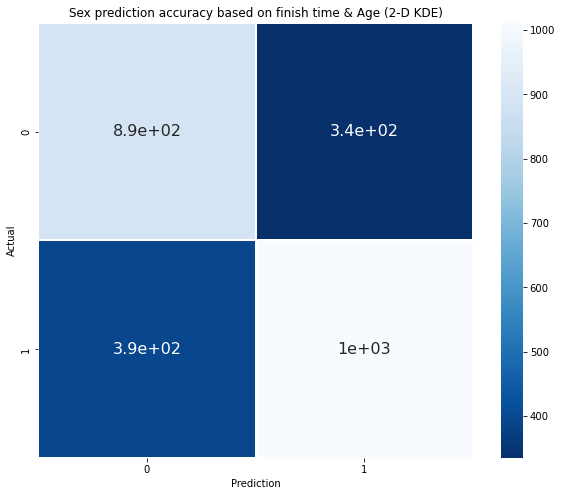

In [10]:
y_true= actual # Array of real labels
y_pred= prediction # Array of predicted labels
c =confusion_matrix(y_true, y_pred) # Confusion matrix
plt.figure(figsize=(10, 8))

sns.heatmap(c, 
            annot=True,
            annot_kws = {"fontsize": 16},
            cbar=True,
            linewidth=2,
            square=True,
            cmap="Blues_r"
            
)
plt.title("Sex prediction accuracy based on finish time & Age (2-D KDE)")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [11]:
accuracy = (c[0,0]+c[1,1]) / len(prediction)* 100
print("The accuracy of prediction in sex based on finish time & age (2-D KDE) was "+ str(accuracy)+"%")

The accuracy of prediction in sex based on finish time & age (2-D KDE) was 72.28136882129277%


### Compare two predictions

According to both 1- dimensional and 2- dimensional results, prediction accuracy in 2 - dimensional KDE returned 72.3% which was 7% higher than 1 -dimensional result.

## Predict the sex of runner with K-NN classifier then compare each with the KDE results.

In this section, we will practice two different conditions as previous section which prediction with one variables and two variables.

Using K-NN classifying method instead of KDE, our goal is to compare each result from KDE to determine which method returns higher probability in prediction.

Since we compare with KDE results, K-NN will also use same variable, finish time & age.

### K-NN classifier comparing with 1-dimensional KDE results

In [12]:
k=50 # Neighbor setting as 50
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(train_df[['total_minutes']], train_df['M/F']) # Neighbor fit to neighbor finish times for determining sex

KNeighborsClassifier(n_neighbors=50)

In [13]:
knn_pred = neigh.predict(test_df[['total_minutes']]) # Prediction based on finish time
knn_pred

array(['F', 'M', 'M', ..., 'F', 'F', 'F'], dtype=object)

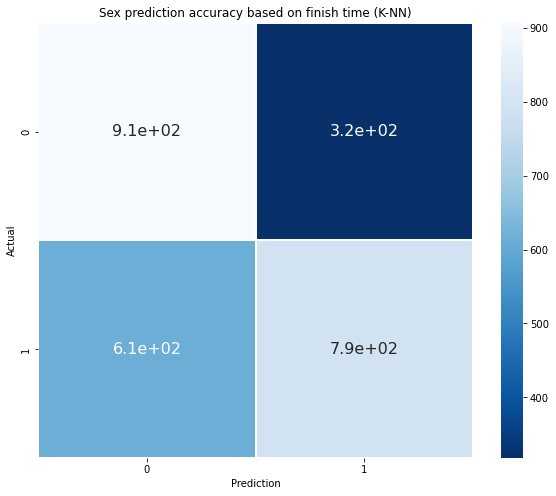

In [14]:
y_true= actual # Array of real labels
y_pred= knn_pred # Array of predicted labels
c =confusion_matrix(y_true, y_pred) # Confusion matrix
plt.figure(figsize=(10, 8))

sns.heatmap(c, 
            annot=True,
            annot_kws = {"fontsize": 16},
            cbar=True,
            linewidth=2,
            square=True,
            cmap="Blues_r"
            
)
plt.title("Sex prediction accuracy based on finish time (K-NN)")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [15]:
accuracy = (c[0,0]+c[1,1]) / len(prediction)* 100
print("The accuracy of prediction in sex based on finish time (K-NN) was "+ str(accuracy)+"%")

The accuracy of prediction in sex based on finish time (K-NN) was 64.60076045627376%


### K-NN classifier comparing with 2-dimensional KDE results

In [16]:
k=50 # Neighbor setting as 50
neigh = KNeighborsClassifier(n_neighbors=k)

# Neighbor fit to neighbor finish times & age for determining sex
neigh.fit(train_df[['total_minutes','Age']], train_df['M/F']) 

KNeighborsClassifier(n_neighbors=50)

In [17]:
knn_pred = neigh.predict(test_df[['total_minutes','Age']]) # Prediction based on finish time & age
knn_pred

array(['F', 'M', 'M', ..., 'F', 'F', 'M'], dtype=object)

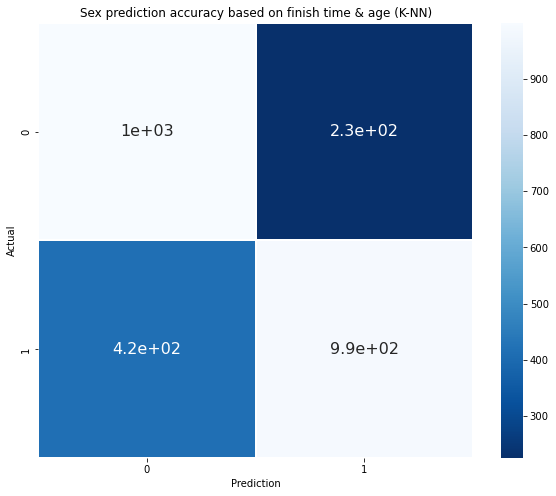

In [18]:
y_true= actual # Array of real labels
y_pred= knn_pred # Array of predicted labels
c =confusion_matrix(y_true, y_pred) # Confusion matrix
plt.figure(figsize=(10, 8))

sns.heatmap(c, 
            annot=True,
            annot_kws = {"fontsize": 16},
            cbar=True,
            linewidth=2,
            square=True,
            cmap="Blues_r"
            
)
plt.title("Sex prediction accuracy based on finish time & age (K-NN)")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [19]:
accuracy = (c[0,0]+c[1,1]) / len(prediction)* 100
print("The accuracy of prediction in sex based on finish time &age (K-NN) was "+ str(accuracy)+"%")

The accuracy of prediction in sex based on finish time &age (K-NN) was 75.5893536121673%


### Compare two predictions

According to K-NN prediction, prediction with single variable returned 64.6% and multi-variable returned 75.6%.
As we compare with the KDE results, prediction in single variable was about 1% higher in KDE result. However, when two variables were taken, prediction in K-NN was about 3% higher than KDE results.

## Predict the finish time with linear regression in 5k time and more.

In this section, we will explore the method of linear regression to predict the finish time based on variables.
 
To study the performance of prediction by the number of explanatory variables, we test in two conditions where single variable vs multi-variables. We will predict based on 5K times in single variable condition and 5K times & age in multi-variable condition.

To determine the accuracy of prediction, we can calculate the difference between actual finish time with regression predicted time. As we calculate the mean of summed difference in absolute value, we are able to identify that smaller mean value has less error in prediction. 


### Predict finish time linear regression in 5k time

In [20]:
df['5k_minutes'] = pd.to_timedelta(df['5K']).dt.total_seconds()/60 # convert 5K times into minutes 
df.head()

,Age,M/F,Country,5K,10K,15K,20K,Half,25K,30K,35K,40K,Finish,Pace,Overall,Gender,Division,total_minutes,5k_minutes
0,25,M,ETH,00:14:43,00:29:43,00:44:57,01:00:29,01:04:02,01:16:07,01:32:00,01:47:59,02:02:39,02:09:17,00:04:56,1,1,1,129.283333,14.716667
1,30,M,ETH,00:14:43,00:29:43,00:44:58,01:00:28,01:04:01,01:16:07,01:31:59,01:47:59,02:02:42,02:09:48,00:04:58,2,2,2,129.800000,14.716667
2,29,M,KEN,00:14:43,00:29:43,00:44:57,01:00:29,01:04:02,01:16:07,01:32:00,01:47:59,02:03:01,02:10:22,00:04:59,3,3,3,130.366667,14.716667
3,28,M,KEN,00:14:43,00:29:44,00:45:01,01:00:29,01:04:02,01:16:07,01:32:00,01:48:03,02:03:47,02:10:47,00:05:00,4,4,4,130.783333,14.716667
4,32,M,KEN,00:14:43,00:29:44,00:44:58,01:00:28,01:04:01,01:16:07,01:32:00,01:47:59,02:03:27,02:10:49,00:05:00,5,5,5,130.816667,14.716667


In [21]:
reg = LinearRegression() # Create linear regression
reg.fit(df[['5k_minutes']],df['total_minutes']) # fit linear regression based on 5K times to predict finish time

LinearRegression()

In [22]:
# add column that shows predicted finish time based on 5K times
df['regression'] = reg.predict(df[['5k_minutes']]) 

# add column for the error between actual and prediction
df['regression_error'] = df['regression'] - df['total_minutes'] 

df.head()

,Age,M/F,Country,5K,10K,15K,20K,Half,25K,30K,...,40K,Finish,Pace,Overall,Gender,Division,total_minutes,5k_minutes,regression,regression_error
0,25,M,ETH,00:14:43,00:29:43,00:44:57,01:00:29,01:04:02,01:16:07,01:32:00,...,02:02:39,02:09:17,00:04:56,1,1,1,129.283333,14.716667,127.007239,-2.276094
1,30,M,ETH,00:14:43,00:29:43,00:44:58,01:00:28,01:04:01,01:16:07,01:31:59,...,02:02:42,02:09:48,00:04:58,2,2,2,129.800000,14.716667,127.007239,-2.792761
2,29,M,KEN,00:14:43,00:29:43,00:44:57,01:00:29,01:04:02,01:16:07,01:32:00,...,02:03:01,02:10:22,00:04:59,3,3,3,130.366667,14.716667,127.007239,-3.359428
3,28,M,KEN,00:14:43,00:29:44,00:45:01,01:00:29,01:04:02,01:16:07,01:32:00,...,02:03:47,02:10:47,00:05:00,4,4,4,130.783333,14.716667,127.007239,-3.776094
4,32,M,KEN,00:14:43,00:29:44,00:44:58,01:00:28,01:04:01,01:16:07,01:32:00,...,02:03:27,02:10:49,00:05:00,5,5,5,130.816667,14.716667,127.007239,-3.809428


### Predict finish time with linear regression in 5K time and age

In [23]:
reg2 = LinearRegression()  # Create linear regression

# fit linear regression based on 5K times and age to predict finish time
reg2.fit(df[['5k_minutes','Age']],df['total_minutes']) 

LinearRegression()

In [24]:
# add column that shows predicted finish time based on 5K times and age
df['regression2'] = reg2.predict(df[['5k_minutes','Age']])

# add column for the error between actual and prediction
df['regression2_error'] = df['regression2'] - df['total_minutes']

df.head()

,Age,M/F,Country,5K,10K,15K,20K,Half,25K,30K,...,Pace,Overall,Gender,Division,total_minutes,5k_minutes,regression,regression_error,regression2,regression2_error
0,25,M,ETH,00:14:43,00:29:43,00:44:57,01:00:29,01:04:02,01:16:07,01:32:00,...,00:04:56,1,1,1,129.283333,14.716667,127.007239,-2.276094,125.074019,-4.209315
1,30,M,ETH,00:14:43,00:29:43,00:44:58,01:00:28,01:04:01,01:16:07,01:31:59,...,00:04:58,2,2,2,129.800000,14.716667,127.007239,-2.792761,125.943387,-3.856613
2,29,M,KEN,00:14:43,00:29:43,00:44:57,01:00:29,01:04:02,01:16:07,01:32:00,...,00:04:59,3,3,3,130.366667,14.716667,127.007239,-3.359428,125.769513,-4.597153
3,28,M,KEN,00:14:43,00:29:44,00:45:01,01:00:29,01:04:02,01:16:07,01:32:00,...,00:05:00,4,4,4,130.783333,14.716667,127.007239,-3.776094,125.595640,-5.187694
4,32,M,KEN,00:14:43,00:29:44,00:44:58,01:00:28,01:04:01,01:16:07,01:32:00,...,00:05:00,5,5,5,130.816667,14.716667,127.007239,-3.809428,126.291135,-4.525532


### Compare two predictions

In [25]:
# mean of total sum in 5k based error 
np.abs(df['regression_error']).mean()

10.973690327026311

In [26]:
# mean of total sum in 5k & age based error 
np.abs(df['regression2_error']).mean()

10.908605377253089

According to two predictions, linear regression based on two variables returned about 0.07 less error than single variable condition. 

## Conclusion

Data analysis is a field that requires analyst to understand the data and determine the best method to retrieve the appropriate and ideal result. With marathon data, we have explored three method of machine techniques each when single variable and multi-variables were used in prediction. As to predict the sex of runner by finish time, KDE result was about 65.4% and K-NN was about 64.6%. prediction in KDE returned about 1% higher than K-NN when single variable was taken in. However, as predicting the sex of runner by finish time and age, KDE result was about 72.3% while K-NN was 75.6%. K-NN had higher accuracy when the two variables were taken in.

In linear regression, we have predicted the finish times based on two conditions where taken 5K times as single variable and 5K time with age as multi-variable. Taking the mean of summed difference of absolute error, single variable returned 10.97 while multi-variable returned 10.91. While the smaller value represent the prediction has less error, prediction of linear regression in multi-variable was higher.

Overall, we were able to discover that as more variables are considered, the prediction will likely to have higher accuracy. However, it does not mean method that returned highest prediction in single variable also return highest prediction in multi-variable. The efficiency of the method can be different by number of variables. 

For further study, we will explore more deep in efficiency of choosing method by multi-variable that more than two are taken in.

## Reference

1.Wikipedia contributors. (2023a). Kernel density estimation. Wikipedia. https://en.wikipedia.org/wiki/Kernel_density_estimation [1]


2.scipy.stats.gaussian_kde — SciPy v1.10.1 Manual. (n.d.). https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html [2]


3.1.9. Naive Bayes. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes [3]


4.Wikipedia contributors. (2023). K-nearest neighbors algorithm. en.wikipedia.org. https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm [4]


5.Wikipedia contributors. (2023b). Linear regression. Wikipedia. https://en.wikipedia.org/wiki/Linear_regression [5]

